## Important

Be sure to read README.md to install all dependencies using pip accordingly before running this notebook.

## Project done by:
1. Lee Juin (U2120621A)
2. Lew Jian Ben Timothy (U2121855L)
3. Johnathan Chow (U2121835D)

### Contributions:
1. Lee Juin
- Researched on the PPO reinforcement learning agent
- Translated the research and findings into the code for the PPO model
- Investigated the efficacy of PPO model
- Presented findings and gave analysis
- Tested the code to be functional and working

2. Lew Jian Ben Timothy
- Researched on the Q-learning reinforcement learning agent and further investigation on the efficacy of PPO
- Translated the research and findings into code for Q-learning and exploration of PPO model
- Tested code

3. Johnathan Chow
- Researched on the Q-learning reinforcement learning agent and further investigation on the efficacy of PPO
- Translated the research and findings into code for Q-learning and exploration of PPO model
- Tested code

## Project Description


A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart. In this project, we will develop a Reinforcement Learning (RL) agent. The trained agent makes the decision to push the cart to the left or right based on the cart position, velocity, and the pole angle, angular velocity.

### Action Space

The action is an *ndarray* with shape (1,) which can take values {0, 1} indicating pushing the cart to the left or right, respectively. Note that the velocity that is reduced or increased by the applied force is not fixed and it depends on the angle the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it.

### State Space

We define *observation* as a state (they are used interchangeably here). The observation is an *ndarray* with shape (4,) with the values corresponding to the following positions and velocities:

| **Observation[n]** | **Observation**       | **Min**             | **Max**           |
| ------- | --------------------- | ------------------- | ----------------- |
| **0**   | Cart Position         | \-4.8               | 4.8               |
| **1**   | Cart Velocity         | \-Inf               | Inf               |
| **2**   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
| **3**   | Pole Angular Velocity | \-Inf               | Inf               |

## Conditions

The challenge is to balance the pole for **500 states per episode**. 

The pole is said to be balanced if:
* Pole Angle is at most ±12°
* Cart Position is at most ±2.4 (center of the cart reaches the edge of the display)

Violation to any of the above two conditions defines an unbalanced pole.

## Solution

We have considered two options for our reinforcement learning algorithm, DQN(**Q-learning**) and PPO(**Proximal Policy Optimization**)

**DQN**
* Uses experience replay to learn from all past policies
* Freezes target Q-network to avoid the moving target issue
* Clip rewards or normalize network adaptive to sensible range

![image](https://user-images.githubusercontent.com/87069189/221127139-9876d36c-d7dc-4224-817e-9e4f6ac40a82.png)

**PPO**
* We maintain two networkes, one with the current policy that we want to refine and second that we use to collect samples
* Clip the objective and calculate the ratio between the new policy and old policy

![image](https://user-images.githubusercontent.com/87069189/221127443-c2cacde4-9e83-44cc-8ac3-ee8a1fdb3687.png)

After considering various factors, we will be using **Proximal Policy Optimization (PPO)**. 




### Rationale

* PPO is generally **more sample-efficient** than Q-learning. It can learn the optimal policy more quickly using fewer samples from the environment. This is useful for this cartpole balancing problem, where each episode is relatively short and time-consuming.

* PPO **can handle continuous state spaces**, whereas Q-learning requires discretization of the state space. Since the cartpole balancing problem has a continuous state space, this could be an advantage for PPO.

* PPO is a **policy optimization algorithm**, which means that it directly optimizes the policy rather than estimating the optimal action-value function. This can be **advantageous when the optimal policy is complex** or difficult to represent in a tabular form, as is the case in many RL problems.

## Import Dependencies

Stable Baselines is a set of improved implementations of Reinforcement Learning (RL) algorithms based on OpenAI Baselines. We will be importing the PPO algorithm from here.

* Reference & more details: https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html
* Implementation code of PPO in stable-baseline3: https://github.com/DLR-RM/stable-baselines3/tree/master/stable_baselines3/ppo

In [1]:
import gym
from gym.wrappers import RecordVideo
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import torch
import glob
from IPython.display import HTML
from IPython import display as ipythondisplay
import io
import base64

## Environment Setup

In [2]:
env_name = 'CartPole-v1'
env = gym.make(env_name)

## Model Training

Check if CUDA device is available.

In [3]:
torch.cuda.is_available()
print(torch.version.cuda)

11.6


### Vectorized Environment

Vectorized Environments are a method for stacking multiple independent environments into a single environment.

This provides two benefits:

* Agent experience can be collected more quickly
* The experience will contain a more diverse range of states, it usually improves exploration

Stable-Baselines provides two types of Vectorized Environment:

* SubprocVecEnv which run each environment in a separate process
* DummyVecEnv which run all environment on the same process
In practice, DummyVecEnv is usually faster than SubprocVecEnv because of communication delays that subprocesses have.

In [4]:
env = gym.make(env_name)
env = DummyVecEnv([lambda: env])

model = PPO('MlpPolicy', env, verbose=1, device="cuda") # run this if you have an Nvidia GPU installed
# model = PPO('MlpPolicy', env, verbose=1, device="auto")   # otherwise run this instead

Using cuda device


### Training the model

Begin training the model using a total timestep of 30000 (i.e., 30000 actions)

* total_timesteps – (int) The total number of samples to train on

* Note: total_timesteps is a single time step in the environment where the agent takes an action and receives a reward and observation from the environment. At each timestep, the agent selects an action based on its current policy, which is then executed in the environment. The environment then returns the next observation and reward to the agent, which is used to update the policy parameters.

In [5]:
# total_timesteps is the number of env.steps(action) being run during training
model.learn(total_timesteps=30000, progress_bar=True)

Output()

-----------------------------
| time/              |      |
|    fps             | 270  |
|    iterations      | 1    |
|    time_elapsed    | 7    |
|    total_timesteps | 2048 |
-----------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 265         |
|    iterations           | 2           |
|    time_elapsed         | 15          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008119784 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00263     |
|    learning_rate        | 0.0003      |
|    loss                 | 6.45        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 53.1        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 261         |
|    iterations           | 3           |
|    time_elapsed         | 23          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.010045525 |
|    clip_fraction        | 0.0608      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.668      |
|    explained_variance   | 0.088       |
|    learning_rate        | 0.0003      |
|    loss                 | 12.3        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0187     |
|    value_loss           | 36          |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 4           |
|    time_elapsed         | 31          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.011503125 |
|    clip_fraction        | 0.128       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.627      |
|    explained_variance   | 0.235       |
|    learning_rate        | 0.0003      |
|    loss                 | 20.8        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0234     |
|    value_loss           | 47.6        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 257         |
|    iterations           | 5           |
|    time_elapsed         | 39          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.007375285 |
|    clip_fraction        | 0.0543      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.619      |
|    explained_variance   | 0.305       |
|    learning_rate        | 0.0003      |
|    loss                 | 19          |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 57.7        |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 257        |
|    iterations           | 6          |
|    time_elapsed         | 47         |
|    total_timesteps      | 12288      |
| train/                  |            |
|    approx_kl            | 0.00628203 |
|    clip_fraction        | 0.0681     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.607     |
|    explained_variance   | 0.522      |
|    learning_rate        | 0.0003     |
|    loss                 | 23.5       |
|    n_updates            | 50         |
|    policy_gradient_loss | -0.0151    |
|    value_loss           | 57.5       |
----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 256         |
|    iterations           | 7           |
|    time_elapsed         | 55          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.008453876 |
|    clip_fraction        | 0.0906      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.569      |
|    explained_variance   | 0.604       |
|    learning_rate        | 0.0003      |
|    loss                 | 21.2        |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 60.9        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 253         |
|    iterations           | 8           |
|    time_elapsed         | 64          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.014114077 |
|    clip_fraction        | 0.137       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.58       |
|    explained_variance   | 0.807       |
|    learning_rate        | 0.0003      |
|    loss                 | 23.9        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0132     |
|    value_loss           | 39.5        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 252         |
|    iterations           | 9           |
|    time_elapsed         | 72          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.005696912 |
|    clip_fraction        | 0.0474      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.574      |
|    explained_variance   | 0.928       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.14        |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.00925    |
|    value_loss           | 21.3        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 253          |
|    iterations           | 10           |
|    time_elapsed         | 80           |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0037808465 |
|    clip_fraction        | 0.0149       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.563       |
|    explained_variance   | 0.0455       |
|    learning_rate        | 0.0003       |
|    loss                 | 1.18         |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.000972    |
|    value_loss           | 28.1         |
------------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 251         |
|    iterations           | 11          |
|    time_elapsed         | 89          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.007080228 |
|    clip_fraction        | 0.0304      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.545      |
|    explained_variance   | -0.0287     |
|    learning_rate        | 0.0003      |
|    loss                 | 12.5        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00214    |
|    value_loss           | 27          |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 251         |
|    iterations           | 12          |
|    time_elapsed         | 97          |
|    total_timesteps      | 24576       |
| train/                  |             |
|    approx_kl            | 0.005508491 |
|    clip_fraction        | 0.0262      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.561      |
|    explained_variance   | 0.833       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.51        |
|    n_updates            | 110         |
|    policy_gradient_loss | -0.00426    |
|    value_loss           | 9.13        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 252         |
|    iterations           | 13          |
|    time_elapsed         | 105         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.006045062 |
|    clip_fraction        | 0.0676      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.554      |
|    explained_variance   | 0.765       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.02        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0115     |
|    value_loss           | 15.4        |
-----------------------------------------


-----------------------------------------
| time/                   |             |
|    fps                  | 250         |
|    iterations           | 14          |
|    time_elapsed         | 114         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.011003085 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.547      |
|    explained_variance   | 0.652       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.1         |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0133     |
|    value_loss           | 2.48        |
-----------------------------------------


------------------------------------------
| time/                   |              |
|    fps                  | 251          |
|    iterations           | 15           |
|    time_elapsed         | 122          |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 0.0024454652 |
|    clip_fraction        | 0.01         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.537       |
|    explained_variance   | -0.00521     |
|    learning_rate        | 0.0003       |
|    loss                 | 0.175        |
|    n_updates            | 140          |
|    policy_gradient_loss | 0.000492     |
|    value_loss           | 1.68         |
------------------------------------------


## Task 1 (Model Testing)

In [6]:
observation = env.reset()
action, _ = model.predict(observation)
print("Observation space is: ", observation)
print("Action taken is: ", action)

Observation space is:  [[-0.01478252  0.04287492 -0.04271546  0.01794403]]
Action taken is:  [1]


## Task 2 (Average Score)

* We ran the trained agent for 100 episodes, and we displayed the score that the agent received for each episode

* Then, we calculated the average score of that the agent received for the 100 episodes

In [7]:
sum_episode_scores = []

for episode in range(1, 100):    ## total 10 episodes
    score = 0                   ## reward init
    obs = env.reset()         ## observations
    done = False                ## episode completes will make done True
    state = 0

    while True:
        action = model.predict(obs)[0]
        n_state, reward, done, info = env.step(action)      ## apply action 
        if (abs(n_state[0][0]) > 2.4 or abs(n_state[0][2]) > 0.209):
            break
        if state == 500:
            break
        obs = n_state
        score += reward  
        state += 1      

    print('Episode:', episode, ';   Score:', score)
    sum_episode_scores.append(score)


print("Average score is ", sum(sum_episode_scores) / len(sum_episode_scores))

env.close()

Episode: 1 ;   Score: [500.]
Episode: 2 ;   Score: [500.]
Episode: 3 ;   Score: [500.]
Episode: 4 ;   Score: [500.]
Episode: 5 ;   Score: [500.]
Episode: 6 ;   Score: [500.]
Episode: 7 ;   Score: [500.]
Episode: 8 ;   Score: [500.]
Episode: 9 ;   Score: [500.]
Episode: 10 ;   Score: [500.]
Episode: 11 ;   Score: [500.]
Episode: 12 ;   Score: [500.]
Episode: 13 ;   Score: [500.]
Episode: 14 ;   Score: [500.]
Episode: 15 ;   Score: [500.]
Episode: 16 ;   Score: [500.]
Episode: 17 ;   Score: [500.]
Episode: 18 ;   Score: [500.]
Episode: 19 ;   Score: [500.]
Episode: 20 ;   Score: [500.]
Episode: 21 ;   Score: [500.]
Episode: 22 ;   Score: [500.]
Episode: 23 ;   Score: [500.]
Episode: 24 ;   Score: [500.]
Episode: 25 ;   Score: [500.]
Episode: 26 ;   Score: [500.]
Episode: 27 ;   Score: [500.]
Episode: 28 ;   Score: [500.]
Episode: 29 ;   Score: [500.]
Episode: 30 ;   Score: [500.]
Episode: 31 ;   Score: [500.]
Episode: 32 ;   Score: [500.]
Episode: 33 ;   Score: [500.]
Episode: 34 ;   Sco

* We then plotted the score of each episode onto a graph and from the graph, we can see that our trained agent performs well on each of the 100 episodes, with only a few outliers.

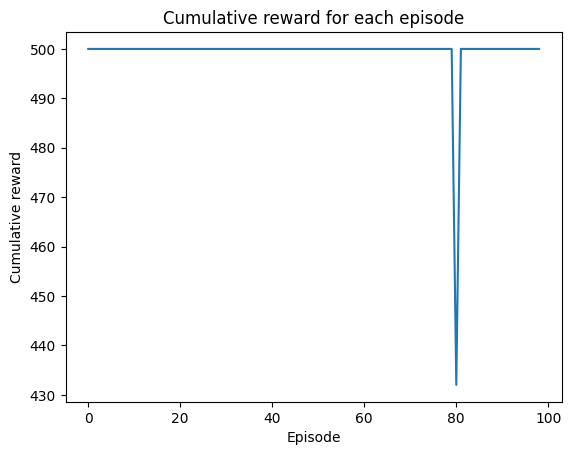

In [8]:
plt.plot(sum_episode_scores)
plt.title("Cumulative reward for each episode")
plt.ylabel("Cumulative reward")
plt.xlabel("Episode")
plt.show()

## Task 3 (1 Episode)

* Task 3 requires us to render one of the episodes played by our PPO agent

In [9]:
from IPython import display as ipythondisplay

def show_video():
    ipythondisplay.clear_output(wait=True)
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                     loop controls style="height: 400px;">
                     <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                     </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")

In [10]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
total = 0
state = 0
while True:
    env.render()
    action = model.predict(observation)[0]
    n_state, reward, done, info = env.step( int(action))      ## apply action 
    if (abs(n_state[0]) > 2.4 or abs(n_state[2]) > 0.209):
        break
    if state == 500:
        break
    observation = n_state 
    total += reward
    state += 1        

env.close()
show_video()

In [11]:
print("Episode reward is ", total)

Episode reward is  500.0


## Further Investigation

Let us examine how good PPO is in terms of total timesteps taken to train in order to achieve a relatively good average score.

In [12]:
avg_score_per_dif_timesteps = []
env_name = 'CartPole-v1'
env = gym.make(env_name)

for i in range(5000, 35000, 5000):
    print("Training model for", i, "timesteps started")
    model = PPO('MlpPolicy', env, verbose=1, device="cuda")
    model.learn(total_timesteps=i, progress_bar=False)
    print("Training model for", i, "timesteps completed")
    sum_episode_scores = []
    for episode in range(1, 100):    ## total 100 episodes
        score = 0                   ## reward init
        obs = env.reset()         ## observations
        done = False                ## episode completes will make done True
        state = 0

        while True:
            action = model.predict(obs)[0]
            n_state, reward, done, info = env.step(action)      ## apply action 
            if (abs(n_state[0]) > 2.4 or abs(n_state[2]) > 0.209):
                break
            if state == 500:
                break
            obs = n_state
            score += reward  
            state += 1      
        sum_episode_scores.append(score)

    avg = sum(sum_episode_scores) / len(sum_episode_scores)
    print("Average score for", i, "timesteps is ", round(avg, 2))
    avg_score_per_dif_timesteps.append(round(avg, 2))

env.close()

Training model for 5000 timesteps started
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | 22.3     |
| time/              |          |
|    fps             | 545      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.9        |
|    ep_rew_mean          | 24.9        |
| time/                   |             |
|    fps                  | 394         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008809587 |
|    clip_fraction        | 0.0993      |
|    clip_range    

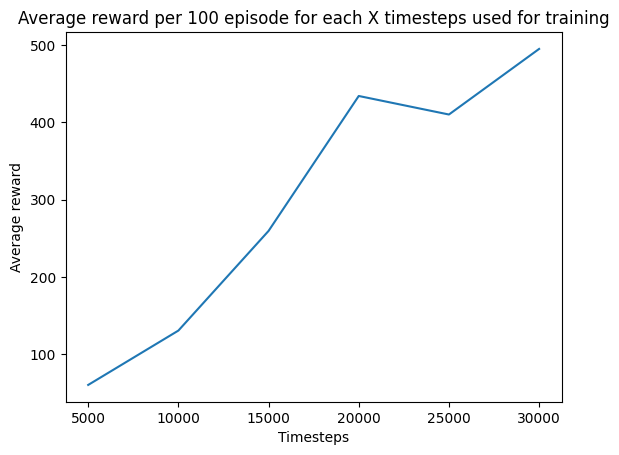

In [13]:
plt.plot(avg_score_per_dif_timesteps)
x_labels = ['5000', '10000', '15000', '20000', '25000', '30000']
plt.title("Average reward per 100 episode for each X timesteps used for training")
plt.ylabel("Average reward")
plt.xlabel("Timesteps")
plt.xticks(range(len(x_labels)), x_labels)
plt.show()

As the graph shown, PPO achieves relatively good average scores (> 300) with only 15000 timesteps and around 25000 timesteps to achieve near perfect score.

## Further Investigation with Q-learning

Let us also explore the difference between Q-learning and PPO to solve the CartPole v1 problem.

References: https://medium.com/swlh/using-q-learning-for-openais-cartpole-v1-4a216ef237df

https://medium.com/@flomay/using-q-learning-to-solve-the-cartpole-balancing-problem-c0a7f47d3f9d

https://www.kaggle.com/code/nikhilbadveli/reinforcement-learning-a-gentle-introduction

https://blog.csdn.net/qq_37445049/article/details/114732628

https://stackoverflow.com/questions/75763702/q-table-not-updating-after-running-q-learning-in-cart-pole-problem



In [14]:
import gym
import numpy as np

# Define the environment
env = gym.make('CartPole-v1')

# Initialize the Q-table
q_table = np.random.uniform(low=-1, high=1, size=([20,20,20,20] + [env.action_space.n]))

# Set hyperparameters
num_episodes = 30000
epsilon = 0.25
learning_rate = 0.2
discount_factor = 0.995

# Define the bins for discretizing the continuous state space
def get_bins():
    return [
        np.linspace(-4.8, 4.8, num=20),
        np.linspace(-4, 4, num=20),
        np.linspace(-0.418, 0.418, num=20),
        np.linspace(-4, 4, num=20)
    ]

# Discretize the state space
def discretize_state(state, bins):
    index = []
    for i in range(len(state)):
        index.append(np.digitize(state[i], bins[i]) - 1)
    return tuple(index)

# Choose an action based on the Q-values
def select_action(state, q_table, eps):
    if np.random.uniform() < eps:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state])

# Update the Q-table based on the observed state, action, next state, and reward
def update_q_table(q_table, state, action, next_state, reward, lr, gamma):
    old_value = q_table[state + (action,)]
    next_max = np.max(q_table[next_state])
    new_value = (1 - lr) * old_value + lr * (reward + gamma * next_max)
    q_table[state + (action,)] = new_value
    return q_table

# Run a single episode and return the total reward
def run_episode(env, q_table, eps, bins):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        state = discretize_state(obs, bins)
        action = select_action(state, q_table, eps)
        obs, reward, done, _ = env.step(action)
        next_state = discretize_state(obs, bins)
        q_table = update_q_table(q_table, state, action, next_state, reward, learning_rate, discount_factor)
        total_reward += reward
    return total_reward

# Train the agent for a specified number of episodes
def train_agent(env, q_table, num_episodes, eps, bins):
    rewards = []
    for i in range(num_episodes):
        total_reward = run_episode(env, q_table, eps, bins)
        rewards.append(total_reward)
        if (i + 1) % 100 == 0:
            avg_reward = np.mean(rewards[-100:])
            print(f"Episode {i+1}/{num_episodes}, average reward: {avg_reward:.2f}")
    return q_table, rewards

# Train the agent
q_table_trained, rewards = train_agent(env, q_table, num_episodes, epsilon, get_bins())


Episode 100/30000, average reward: 39.69
Episode 200/30000, average reward: 77.49
Episode 300/30000, average reward: 93.03
Episode 400/30000, average reward: 96.69
Episode 500/30000, average reward: 104.38
Episode 600/30000, average reward: 115.51
Episode 700/30000, average reward: 133.74
Episode 800/30000, average reward: 122.28
Episode 900/30000, average reward: 110.59
Episode 1000/30000, average reward: 112.27
Episode 1100/30000, average reward: 130.04
Episode 1200/30000, average reward: 127.55
Episode 1300/30000, average reward: 134.62
Episode 1400/30000, average reward: 138.98
Episode 1500/30000, average reward: 148.94
Episode 1600/30000, average reward: 131.65
Episode 1700/30000, average reward: 121.59
Episode 1800/30000, average reward: 132.84
Episode 1900/30000, average reward: 118.08
Episode 2000/30000, average reward: 119.91
Episode 2100/30000, average reward: 145.53
Episode 2200/30000, average reward: 135.61
Episode 2300/30000, average reward: 136.50
Episode 2400/30000, aver

In [15]:
avg_reward = np.mean(rewards)
print(f"Average reward over 100 episodes: {avg_reward:.2f}")

Average reward over 100 episodes: 256.35


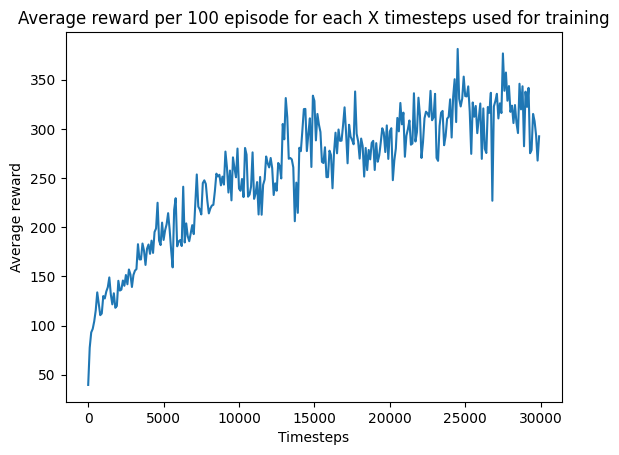

In [16]:
import matplotlib.pyplot as plt

# Calculate the average reward per 100 episodes
avg_rewards = [np.mean(rewards[i:i+100]) for i in range(0, num_episodes, 100)]

# Plot the graph
plt.plot(range(0, num_episodes, 100), avg_rewards)
plt.xlabel('Timesteps')
plt.ylabel('Average reward')
plt.title("Average reward per 100 episode for each X timesteps used for training")
plt.show()

#### In the case of CartPole-v1, PPO may be better suited for several reasons:

* Continuous Action Space:   
CartPole-v1 has a continuous action space, which means that there are infinitely many possible actions that the agent can take. Q-learning is not well-suited for continuous action spaces, as it requires discretization of the action space, which can lead to poor performance. PPO, on the other hand, can learn a continuous policy directly without requiring discretization.

* Sample Efficiency:   
PPO is typically more sample-efficient than Q-learning, meaning that it can achieve good performance with fewer training episodes. This can be important in CartPole-v1, which is a relatively simple environment, but may require a large number of episodes to train with Q-learning.

* Training Time:   
CartPole-v1 has a continuous action space, which requires Q-learning to discretize the action space, which can lead to poor performance and longer training times. On the other hand, PPO can learn a continuous policy directly without discretization, which can be more efficient in this type of environment.